In [ ]:
# default_exp sinflower

In [ ]:
# export
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
from matplotlib.collections import LineCollection
from pathlib import Path
from scipy import spatial
from tqdm import tqdm


from good_robot.gram import layer_to_lines, lines_to_layer, Turtle
from good_robot import write

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
#export
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

In [ ]:
#export
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [ ]:
# export
def generalized_sinflower_transform(r, Θ, A=1, B=-1, C=-1, D=1, E=1, F=1, G=-1, H=-1, I=1, J=1):
        r_out = A + ((B * r) + (C * np.sin((D * Θ) ** 2))) * E
        Θ_out = F + ((G * Θ) + (H * np.cos((I * r) ** 2))) * J
        return r_out, Θ_out

In [ ]:
def replace_random_points_with_nan(layer, frac_to_replace=0.2):
    _layer = layer.copy()
    n_points = _layer.shape[1]
    remove_ind = np.random.choice(n_points, size=int(n_points*frac_to_replace), replace=False)
    _layer[:,remove_ind] = np.nan
    return _layer

In [ ]:
class Sinflower(object):
    
    def __init__(
            self,
            r_start=-0.7,
            r_end=0.7,
            r_step=0.03,
            Θ_start=-np.pi*2,
            Θ_end=np.pi*2,
            Θ_step=0.01,):
        
        self.r_start = r_start
        self.r_end = r_end
        self.r_step = r_step
        self.Θ_start = Θ_start
        self.Θ_end = Θ_end
        self.Θ_step = Θ_step
        self.lines = []
        self.transform_params = {
            'A':1, 
            'B':-1, 
            'C':-1, 
            'D':1, 
            'E':1, 
            'F':1, 
            'G':-1, 
            'H':-1, 
            'I':1, 
            'J':1
        }
        
    @property
    def rs(self):
        return np.arange(self.r_start, self.r_end, self.r_step)
    
    @property
    def Θs(self):
        return np.arange(self.Θ_start, self.Θ_end, self.Θ_step)
    
    
    
    def

In [ ]:
class 

In [ ]:
ys = np.arange(-np.pi*2, np.pi*2+0.01,.01)
xs = np.arange(-0.5, 0.5, 0.04)

In [ ]:
([np.stack([np.ones(ys.shape)*x, ys])  for x in xs])    

[array([[-0.5       , -0.5       , -0.5       , ..., -0.5       ,
         -0.5       , -0.5       ],
        [-6.28318531, -6.27318531, -6.26318531, ...,  6.26681469,
          6.27681469,  6.28681469]]),
 array([[-0.46      , -0.46      , -0.46      , ..., -0.46      ,
         -0.46      , -0.46      ],
        [-6.28318531, -6.27318531, -6.26318531, ...,  6.26681469,
          6.27681469,  6.28681469]]),
 array([[-0.42      , -0.42      , -0.42      , ..., -0.42      ,
         -0.42      , -0.42      ],
        [-6.28318531, -6.27318531, -6.26318531, ...,  6.26681469,
          6.27681469,  6.28681469]]),
 array([[-0.38      , -0.38      , -0.38      , ..., -0.38      ,
         -0.38      , -0.38      ],
        [-6.28318531, -6.27318531, -6.26318531, ...,  6.26681469,
          6.27681469,  6.28681469]]),
 array([[-0.34      , -0.34      , -0.34      , ..., -0.34      ,
         -0.34      , -0.34      ],
        [-6.28318531, -6.27318531, -6.26318531, ...,  6.26681469,
        

In [ ]:
sf = Sinflower()

(-0.8465481387471978,
 0.7927389711583739,
 -0.8012138545620764,
 0.8380732553434953)

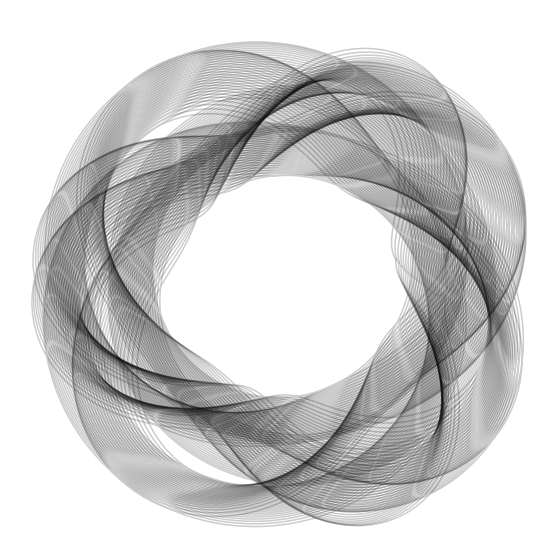

In [ ]:
lines = []
plt.close('all')
ys = np.arange(-np.pi*2, np.pi*2+0.01,.01)
for x in np.arange(-0.5, 0.5, 0.04):
    X,Y = transform(np.ones(ys.shape)*x, ys)
    X,Y = pol2cart((X * 0.15 + 0.4), (Y * 4 + x*0.3))
    lines.append(np.stack([X.copy(), Y.copy()]).T)
f,ax = plt.subplots(figsize=(10,10))
lc = LineCollection(lines, color='k', alpha=0.2)
ax.add_collection(lc)
ax.axis('tight')
ax.axis('square')
ax.axis('off')

In [ ]:
len()

(-0.8465446042864376,
 0.7926647474824348,
 -0.8010151695267314,
 0.838194182242141)

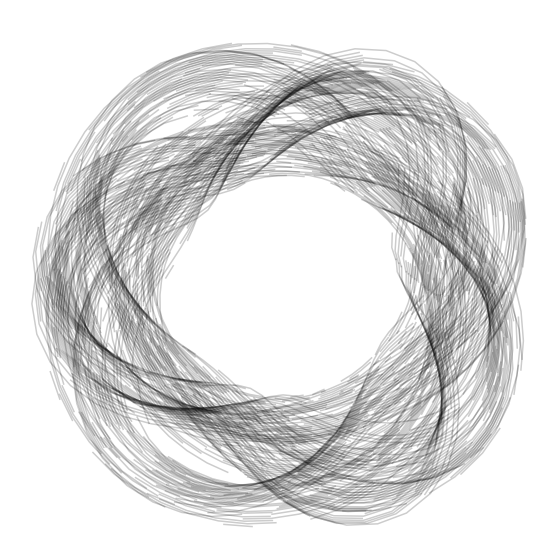

In [ ]:
lines = []
plt.close('all')
ys = np.arange(-np.pi*2, np.pi*2+0.01,.03)
xs = np.arange(-0.5, 0.5, 0.04)
for x in xs:
    X,Y = transform(np.ones(ys.shape)*x, ys)
    X,Y = pol2cart((X * 0.15 + 0.4), (Y * 4 + x*0.3))
    line = np.stack([X.copy(), Y.copy()]).T
    lines.append(line)
    
layer = np.stack(lines_to_layer(lines))
layer = replace_random_points_with_nan(layer, frac_to_replace=0.2)

f,ax = plt.subplots(figsize=(10,10))
lc = LineCollection(layer_to_lines(layer), color='k', alpha=0.2)
ax.add_collection(lc)
ax.axis('tight')
ax.axis('square')
ax.axis('off')

(-0.8520273636708575,
 0.798093718375477,
 -0.8066564884828037,
 0.8434645935635309)

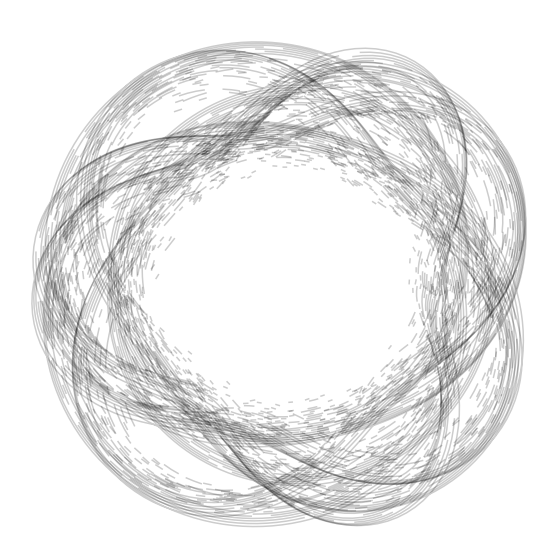

In [ ]:
lines = []
plt.close('all')
ys = np.arange(-np.pi*2, np.pi*2+0.01,.01)
xs = np.arange(-0.5, 0.5, 0.04)
for x in xs:
    X,Y = transform(np.ones(ys.shape)*x, ys)
    X,Y = pol2cart((X * 0.15 + 0.4 + (x**2)*0.02), (Y * 4 + x*0.3))
    line = np.stack([X.copy(), Y.copy()])
    line = replace_random_points_with_nan(line, frac_to_replace=x+0.5).T
    lines.append(line)
    
layer = np.stack(lines_to_layer(lines))
# layer = 

f,ax = plt.subplots(figsize=(10,10))
lc = LineCollection(layer_to_lines(layer), color='k', alpha=0.2)
ax.add_collection(lc)
ax.axis('tight')
ax.axis('square')
ax.axis('off')

In [ ]:
savedir = Path('/mnt/c/code/side/good_robot/images')
filename = '0054_sinflower_sparse.svg'
save_filepath = savedir.joinpath(filename)
write.write_plot(plot=[layer], filename=save_filepath, margin=0.2)

In [ ]:
line.shape

(1258, 2)

(-0.8509143541908308,
 0.7980407179240472,
 -0.8065904456910148,
 0.8423646264238632)

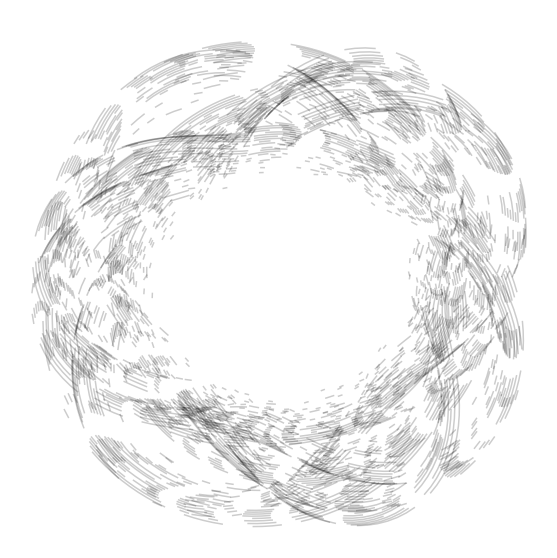

In [ ]:
lines = []
plt.close('all')
ys = np.arange(-np.pi*2, np.pi*2+0.01,.01)
xs = np.arange(-0.5, 0.5, 0.04)

n_points = len(ys)
frac_to_replace = 0.25
remove_ind = np.random.choice(n_points, size=int(n_points*frac_to_replace), replace=False)

for x in xs:
    X,Y = transform(np.ones(ys.shape)*x, ys)
    X,Y = pol2cart((X * 0.15 + 0.4 + (x**2)*0.02), (Y * 4 + x*0.3))
    line = np.stack([X.copy(), Y.copy()])
    line[:, remove_ind] = np.nan
    line = replace_random_points_with_nan(line, frac_to_replace=(x+0.5) * 0.9)
    lines.append(line.T)
    
layer = np.stack(lines_to_layer(lines))
# layer = 

f,ax = plt.subplots(figsize=(10,10))
lc = LineCollection(layer_to_lines(layer), color='k', alpha=0.2)
ax.add_collection(lc)
ax.axis('tight')
ax.axis('square')
ax.axis('off')